In [57]:
import numpy as np;
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [58]:

from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Read data from csv
loan_data=pd.read_csv('Loan_Prediction_Data.csv')

### Data Overview

In [60]:
loan_data.shape

(614, 13)

In [61]:
loan_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [62]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [63]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [64]:
loan_data.isnull().sum()/len(loan_data) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:>

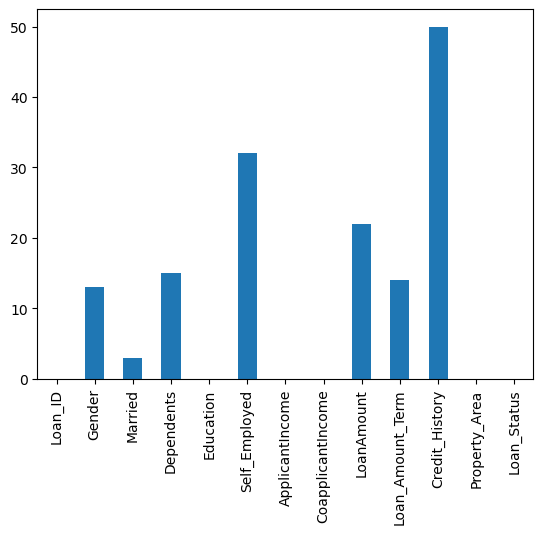

In [65]:
loan_data.isnull().sum().plot(kind='bar')

In [66]:
loan_data=loan_data.drop('Loan_ID' ,axis=1)

In [67]:
loan_data['Loan_Amount_Term'].max()

480.0

### Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

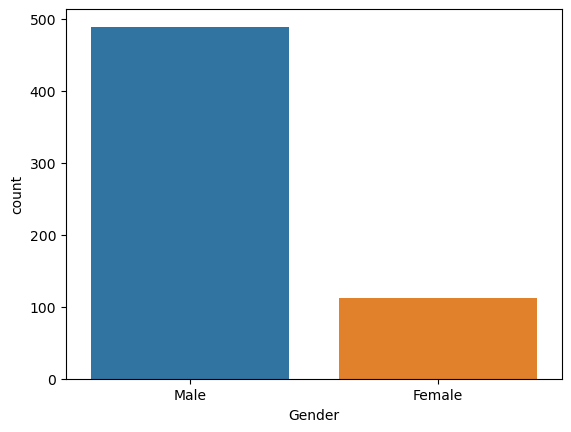

In [68]:
sns.countplot(loan_data['Gender'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

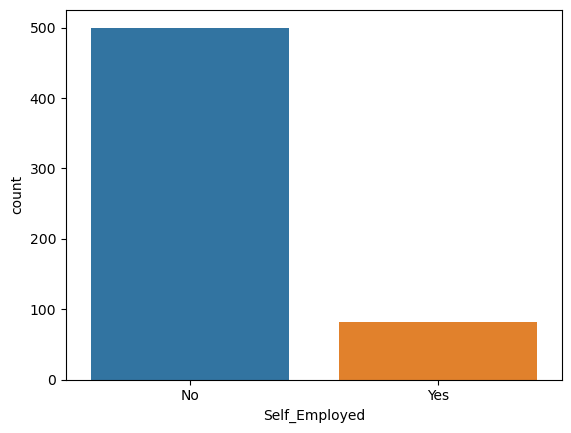

In [69]:

sns.countplot(loan_data['Self_Employed'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

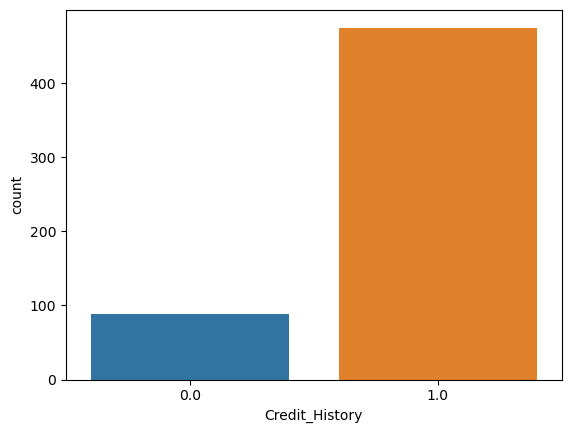

In [70]:
sns.countplot(loan_data['Credit_History'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

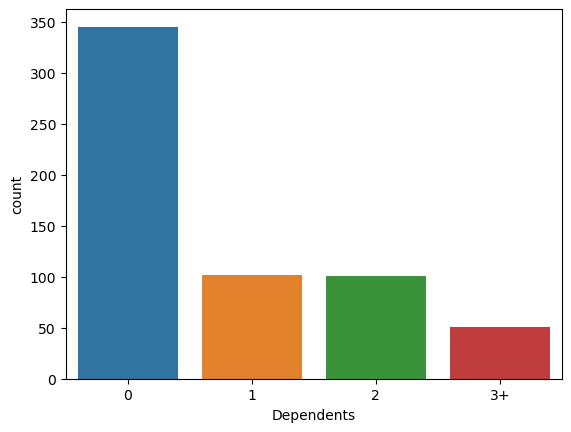

In [71]:
sns.countplot(loan_data['Dependents'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

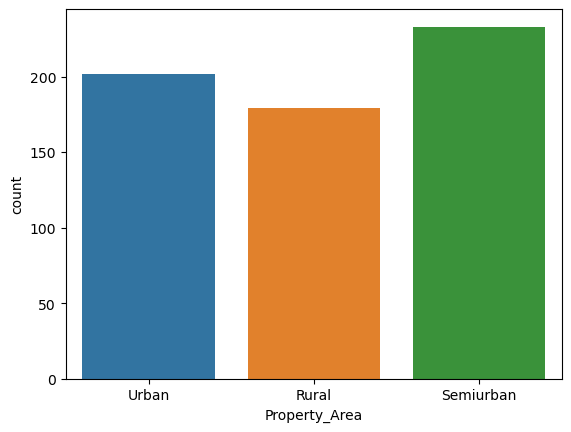

In [72]:
sns.countplot(loan_data['Property_Area'])


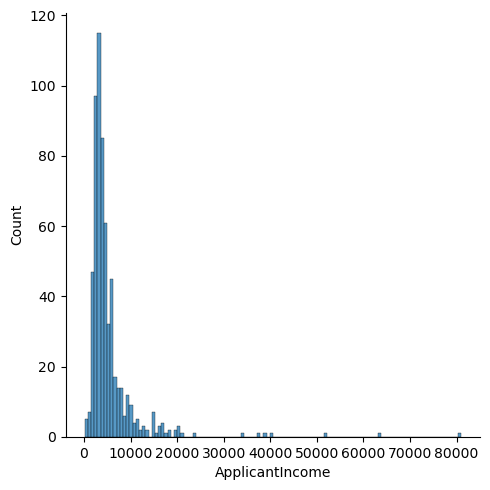

In [73]:
# Analysis of numerical features
sns.displot(loan_data['ApplicantIncome'])

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

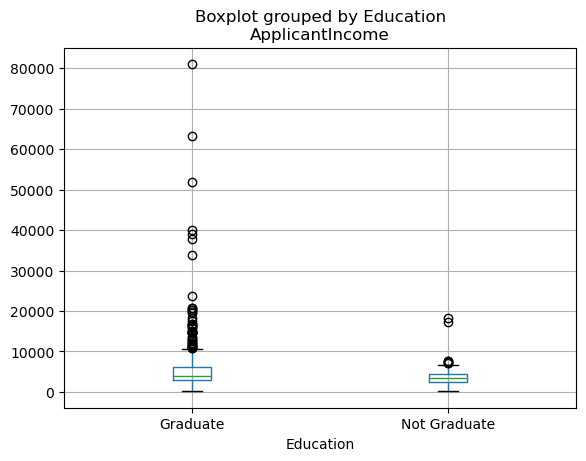

In [74]:
loan_data.boxplot(column="ApplicantIncome",by='Education')

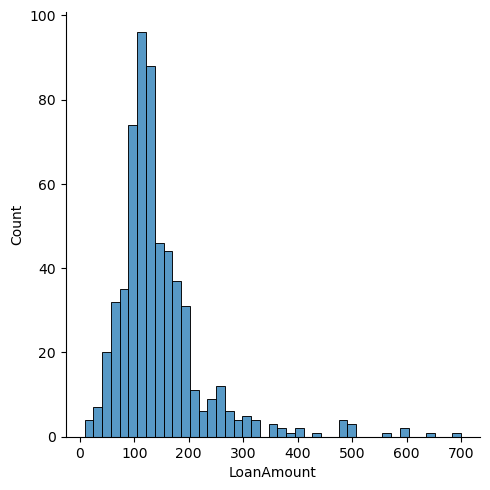

In [75]:
sns.displot(loan_data['LoanAmount'])

### Missing Values

In [76]:
# Filling missing Values
# Categorical Data
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0],inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0],inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0],inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0],inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0],inplace=True)

# Numerical Data
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0],inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace=True)

<AxesSubplot:>

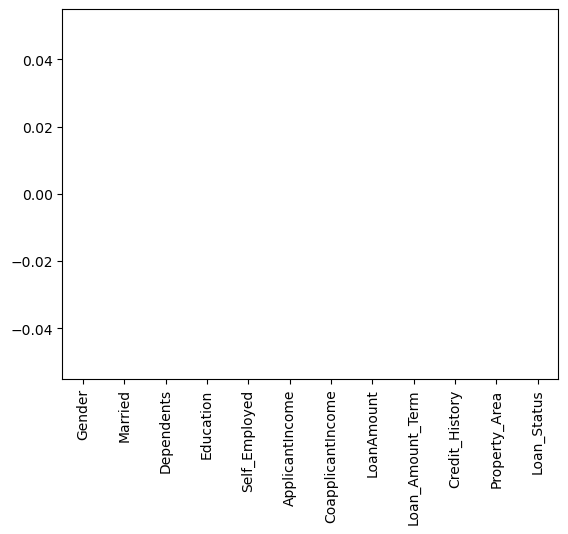

In [77]:
loan_data.isnull().sum().plot(kind='bar')

<AxesSubplot:xlabel='Gender'>

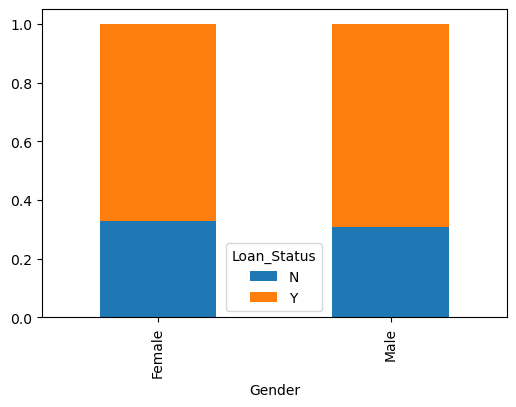

In [78]:
# Relation between target variable and independent variable

Gend_rel=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
Gend_rel.div(Gend_rel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4))

<AxesSubplot:xlabel='Married'>

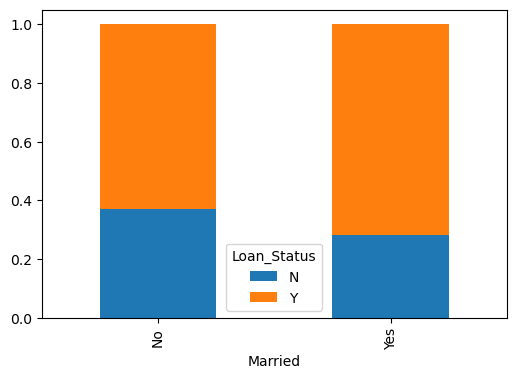

In [79]:
Marr_rel=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Marr_rel.div(Marr_rel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,4))

<AxesSubplot:xlabel='Credit_History'>

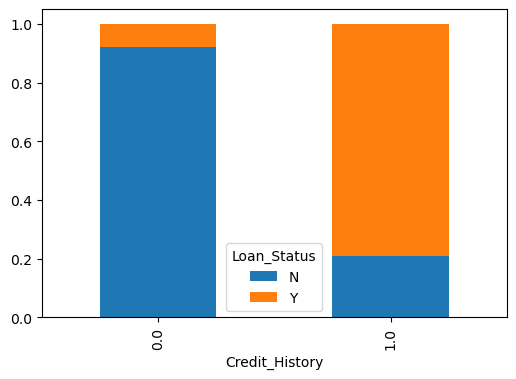

In [80]:
Cred_rel=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Cred_rel.div(Cred_rel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,
                                                       figsize=(6,4))

<AxesSubplot:xlabel='Dependents'>

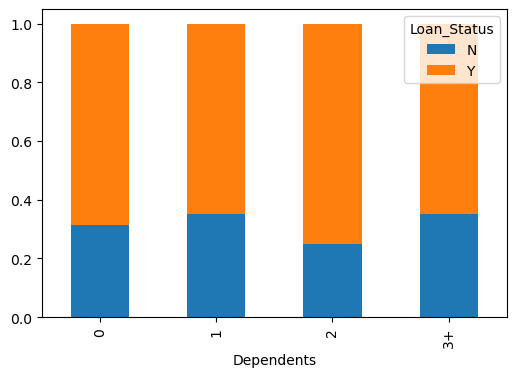

In [81]:
Cred_rel=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
Cred_rel.div(Cred_rel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,
                                                       figsize=(6,4))

<AxesSubplot:xlabel='Property_Area'>

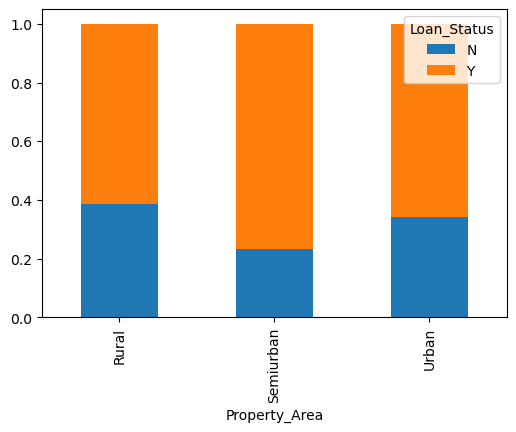

In [82]:
Cred_rel=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Cred_rel.div(Cred_rel.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,
                                                       figsize=(6,4))

<AxesSubplot:>

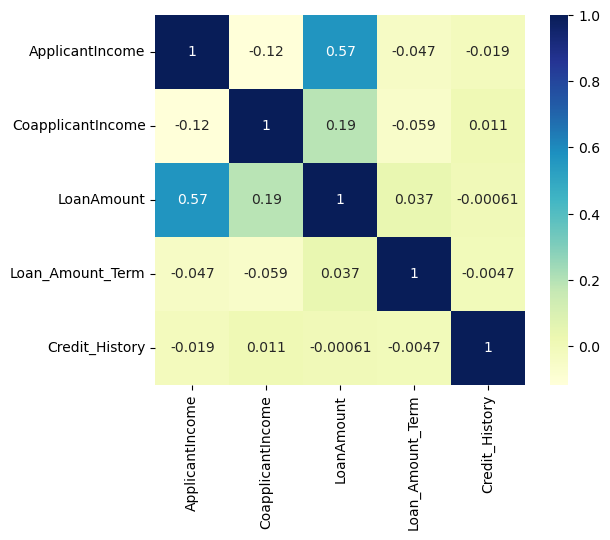

In [83]:
corr_mat = loan_data.corr()
sns.heatmap(corr_mat,square=True,cmap='YlGnBu',annot=True)

### Data Preprocessing

In [84]:
# Encoding Categorical Values
def fun(s):
    if(s=="Yes"):
        return 1
    elif(s=="No"):
        return 0

loan_data["Self_Employed"]=loan_data.Self_Employed.apply(fun)

In [85]:
def fun(s):
    if(s=="Urban"):
        return 2
    elif(s=="Rural"):
        return 1
    elif(s=="Semiurban"):
        return 0

loan_data["Property_Area"]=loan_data.Property_Area.apply(fun)

In [86]:
def fun(s):
    if(s=="Y"):
        return 1
    elif(s=="N"):
        return 0

loan_data["Loan_Status"]=loan_data.Loan_Status.apply(fun)

In [87]:
def fun(s):
    if(s=="3+"):
        return 3
    elif(s=="1"):
        return 1
    elif(s=="0"):
        return 0
    elif(s=="2"):
        return 2

loan_data["Dependents"]=loan_data.Dependents.apply(fun)

In [88]:
def fun(s):
    if(s=="Graduate"):
        return 1
    elif(s=="Not Graduate"):
        return 0

loan_data["Education"]=loan_data.Education.apply(fun)

In [89]:
def fun(s):
    if(s=="Yes"):
        return 1
    elif(s=="No"):
        return 0

loan_data["Married"]=loan_data.Married.apply(fun)

In [90]:
def fun(s):
    if(s=="Male"):
        return 1
    elif(s=="Female"):
        return 0

loan_data["Gender"]=loan_data.Gender.apply(fun)

<AxesSubplot:>

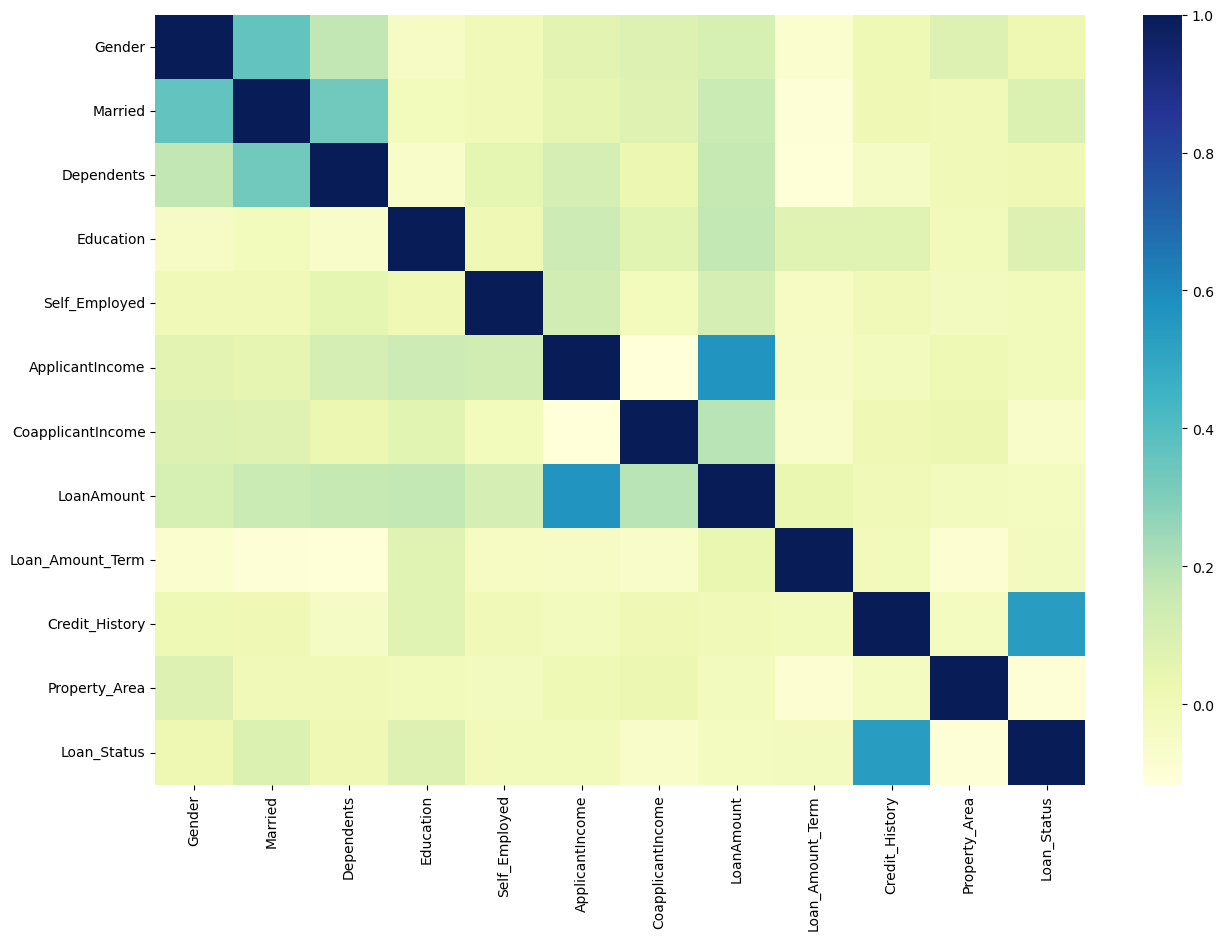

In [91]:
plt.figure(figsize=(15,10)) 
corr_mat = loan_data.corr()
sns.heatmap(corr_mat,cmap='YlGnBu')

### Data Modelling

In [92]:
X=loan_data.drop('Loan_Status',axis=1)
Y=loan_data.Loan_Status

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((460, 11), (154, 11), (460,), (154,))

In [94]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_mod=LogisticRegression()
lr_mod.fit(x_train,y_train)
pred_y=lr_mod.predict(x_test)
print("the accuracy is : ",metrics.accuracy_score(y_test,pred_y),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test,pred_y))

the accuracy is :  0.7857142857142857 

Confusion Matrix : 
 [[  0  33]
 [  0 121]]


In [95]:
# Random Forest Classifier
rf_mod = RandomForestClassifier(n_estimators=100)
rf_mod.fit(x_train,y_train)
pred_y2 = rf_mod.predict(x_test)
print("the accuracy is : ",metrics.accuracy_score(y_test,pred_y2),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test,pred_y2))

the accuracy is :  0.8246753246753247 

Confusion Matrix : 
 [[ 15  18]
 [  9 112]]


In [96]:
# SVM
svm_mod = SVC()
svm_mod.fit(x_train,y_train)
pred_y3 = svm_mod.predict(x_test)
print("the accuracy is : ",metrics.accuracy_score(y_test,pred_y3),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test,pred_y3))

the accuracy is :  0.7857142857142857 

Confusion Matrix : 
 [[  0  33]
 [  0 121]]


In [97]:
gnb_mod = GaussianNB()
gnb_mod.fit(x_train, y_train)
pred_y4=gnb_mod.predict(x_test)
print("the accuracy is : ",metrics.accuracy_score(y_test,pred_y4),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(y_test,pred_y4))

the accuracy is :  0.8506493506493507 

Confusion Matrix : 
 [[ 12  21]
 [  2 119]]


In [98]:
# Modification in Data Model

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

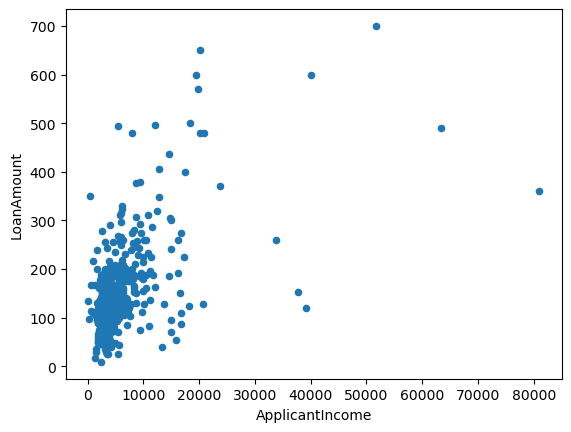

In [99]:
 loan_data.plot.scatter('ApplicantIncome','LoanAmount')

<AxesSubplot:xlabel='TempApp_Income'>

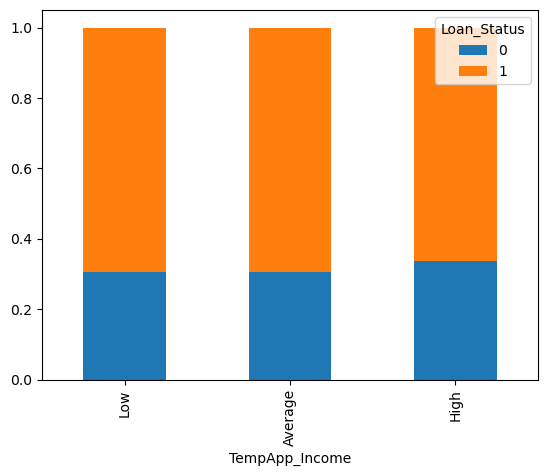

In [100]:
bins=[0,3000,6000,81000]
group=['Low','Average','High']
loan_data['TempApp_Income']=pd.cut(loan_data['ApplicantIncome'],bins,labels=group)
App_Income=pd.crosstab(loan_data['TempApp_Income'],loan_data['Loan_Status'])
App_Income.div(App_Income.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)

1188.5
41667.0


<AxesSubplot:xlabel='TempCo_Income'>

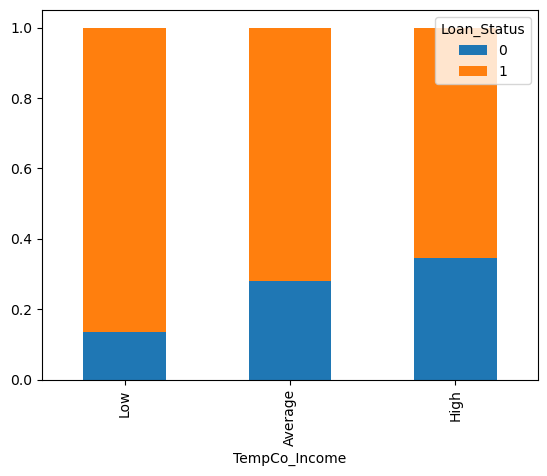

In [101]:
print(loan_data['CoapplicantIncome'].median())
print(loan_data['CoapplicantIncome'].max())
bins=[0,1000,4000,42000]
group=['Low','Average','High']
loan_data['TempCo_Income']=pd.cut(loan_data['CoapplicantIncome'],bins,labels=group)
Co_Income=pd.crosstab(loan_data['TempCo_Income'],loan_data['Loan_Status'])
Co_Income.div(Co_Income.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

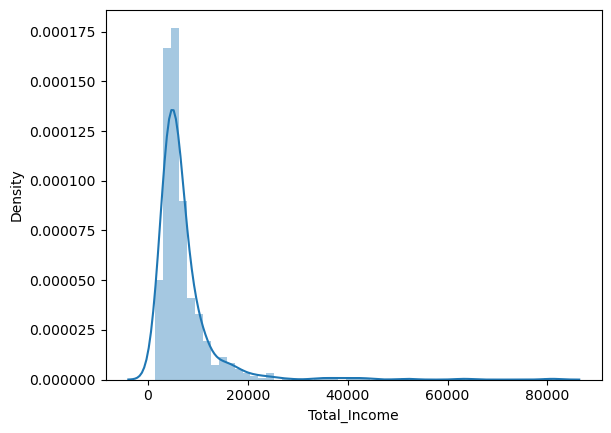

In [102]:
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']
sns.distplot(loan_data['Total_Income'])

In [103]:
print(loan_data['Total_Income'].median())
print(loan_data['Total_Income'].max())


5416.5
81000.0


<AxesSubplot:xlabel='Total_Income_Temp'>

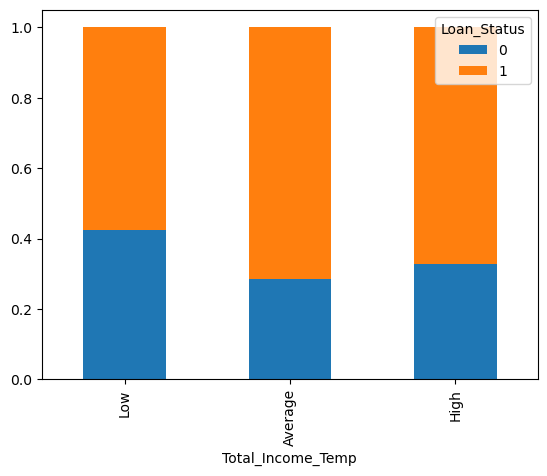

In [104]:
bins=[0,3000,6000,81000]
group=['Low','Average','High']
loan_data['Total_Income_Temp']=pd.cut(loan_data['Total_Income'],bins,labels=group)
Temp_Total_Income=pd.crosstab(loan_data['Total_Income_Temp'],loan_data['Loan_Status'])
Temp_Total_Income.div(Temp_Total_Income.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)


<AxesSubplot:xlabel='New_Total_Income', ylabel='Density'>

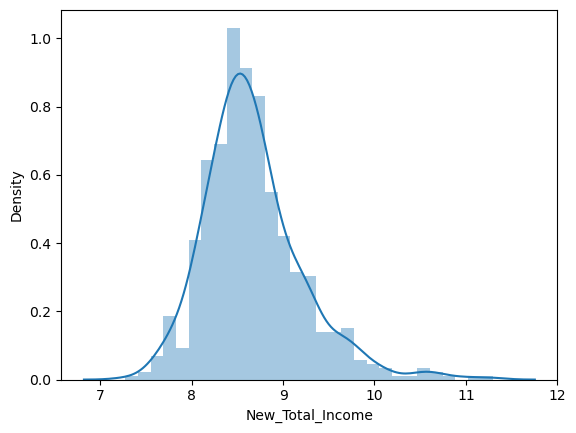

In [105]:
loan_data['New_Total_Income'] = np.log(loan_data['Total_Income'])
sns.distplot(loan_data['New_Total_Income'])

<AxesSubplot:xlabel='New_LoanAmount', ylabel='Density'>

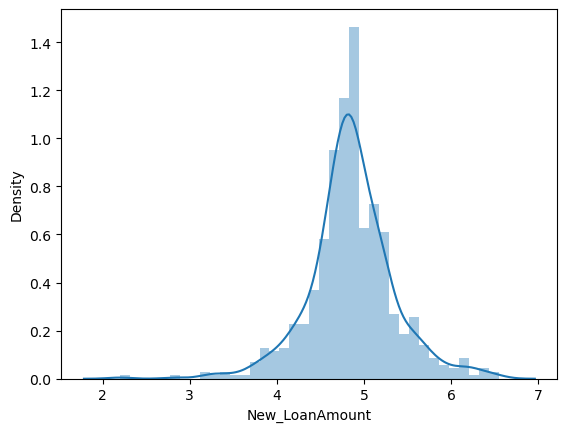

In [106]:
loan_data['New_LoanAmount'] = np.log(loan_data['LoanAmount'])
sns.distplot(loan_data['New_LoanAmount'])

In [107]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TempApp_Income', 'TempCo_Income', 'Total_Income', 'Total_Income_Temp',
       'New_Total_Income', 'New_LoanAmount'],
      dtype='object')

In [108]:
loan_data=loan_data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TempApp_Income','TempCo_Income','Total_Income_Temp','Total_Income'],axis=1)

In [109]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'New_Total_Income', 'New_LoanAmount'],
      dtype='object')

In [110]:
# Modified Model
Xm=loan_data.drop('Loan_Status',axis=1)
Ym=loan_data.Loan_Status

In [111]:
xm_train,xm_test,ym_train,ym_test=train_test_split(Xm,Ym,test_size=0.25,random_state=3)
xm_train.shape,xm_test.shape,ym_train.shape,ym_test.shape

((460, 10), (154, 10), (460,), (154,))

In [112]:
# Logistic Regression
lrm_mod=LogisticRegression()
lrm_mod.fit(xm_train,ym_train)
pred_ym=lrm_mod.predict(xm_test)
print("the accuracy is : ",metrics.accuracy_score(ym_test,pred_ym),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(ym_test,pred_ym))

the accuracy is :  0.8441558441558441 

Confusion Matrix : 
 [[ 13  20]
 [  4 117]]


In [113]:
# Random Forest Classifier
rfm_mod = RandomForestClassifier(n_estimators=100)
rfm_mod.fit(xm_train,ym_train)
pred_ym2 = rfm_mod.predict(xm_test)
print("the accuracy is : ",metrics.accuracy_score(ym_test,pred_ym2),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(ym_test,pred_ym2))

the accuracy is :  0.7987012987012987 

Confusion Matrix : 
 [[ 14  19]
 [ 12 109]]


In [114]:
# SVM
svmm_mod = SVC(kernel='linear',random_state=0)
svmm_mod.fit(xm_train,ym_train)
pred_ym3 = svmm_mod.predict(xm_test)
print("the accuracy is : ",metrics.accuracy_score(ym_test,pred_ym3),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(ym_test,pred_ym3))

the accuracy is :  0.8506493506493507 

Confusion Matrix : 
 [[ 13  20]
 [  3 118]]


In [115]:
gnbm_mod = GaussianNB()
gnbm_mod.fit(xm_train, ym_train)
pred_ym4=gnbm_mod.predict(xm_test)
print("the accuracy is : ",metrics.accuracy_score(ym_test,pred_ym4),'\n')
print("Confusion Matrix : \n", metrics.confusion_matrix(ym_test,pred_ym4))

the accuracy is :  0.8506493506493507 

Confusion Matrix : 
 [[ 13  20]
 [  3 118]]


In [116]:
import pickle
filename='Svm_model.sav'
pickle.dump(svm_mod,open(filename,'wb'))

In [117]:
filename2='Modifiedsvm_model.sav'
pickle.dump(svmm_mod,open(filename2,'wb'))

In [118]:
filename3='ModifiedGn_model.sav'
pickle.dump(gnbm_mod,open(filename3,'wb'))

In [119]:
filename4='Lr_model.sav'
pickle.dump(lr_mod,open(filename4,'wb'))